In [2]:
import statistics as st
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fftpack as sp
import scipy.signal as signal
%matplotlib inline
import glob
import os
from openpyxl import load_workbook
import openpyxl

In [2]:
!pip install XlsxWriter

# Spectral moments

Spectral moments can be calculated from the PSD.
$m_h$ corresponds to the h'th moment of the spectrum and is calculated as;

$$m_h=\int_{f=0}^{f=\infty}f^hS(f)df$$  

0'th moment or $m_0$ can be calculated by taking h as 0;

$$m_0=\int_{f=0}^{f=\infty}S(f)df=\sigma_f^2$$

Mean wave periods can also be calculated by spectral moments. $T_{02}$ is the spectral representation of the zero crossing mean wave period. 

$$T_{01}=\frac{m_0}{m_1};\,\,\, T_{02}=\sqrt{\frac{m_0}{m2}};\,\,\, T_p=\frac{1}{f_p}$$

Spectral bandwith $\varepsilon$ [0 .. 1] can also be calculated from spectral moments. Values near zero represents a narrow bandwith and pure rayleigh disribution while values near 1 represent random distribution of wave heights. 

$$\varepsilon^2=1-\frac{m_2^2}{m_0 m_4}$$


In [4]:
parent_dir = 'C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022'

In [5]:
os.getcwd()

'C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\Spectrum Analysis'

In [38]:
os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\Spectrum_Ortak')

In [39]:
spectra_files = os.listdir()

In [40]:
len_spec = len(spectra_files)
len_spec

285

In [41]:
columns = ['Case', 'm0', 'm1', 'm2', 'T01', 'T02']
Table = pd.DataFrame(columns = columns)
Table

,Case,m0,m1,m2,T01,T02


In [47]:
sensor = ["p87", "p19", "p18", "p45", "p17", "p15", "p16", "p14", "p13", "p12", "p26", "p23", "p05", "p04", "p03", "p02", "p01"]
sens_loc = [-884.1100, -480.3400, -398.3900, -370.0800, -320.3700, -264.7000, -252.0300, -240.55000, -220.2300, -205.3400, -190.2000, -190.2000, -169.5000, -160.7700, -145.4200, -135.0100, -124.9400]

In [48]:
case_list = []
m0_list = []
m1_list = []
m2_list = []
T01_list = []
T02_list = []
Hm0_list = []
sens_loc_list = []

In [49]:
writer = pd.ExcelWriter(parent_dir + '/' + "spectral_analysis5.xlsx", engine='xlsxwriter')

In [50]:
for j in range(len_spec):
    os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\Spectrum_Ortak')
    Spectra = pd.ExcelFile(spectra_files[j])
    sheets = Spectra.sheet_names
    for i in range(len(sheets)):
        data = pd.read_excel(Spectra, sheets[i], index_col=0)
        #Convert NaN values to empty string
        nan_value = float("NaN")
        data.replace("", nan_value, inplace=True)
        data.dropna(subset = ["Freq"], inplace=True)
        data.dropna(subset = ["PSSE (Fit)"], inplace=True)
        case = sheets[i]
        fx = data.iloc[:, 0].values
        psd = data.iloc[:, 2].values
        m0=np.trapz(psd,fx)
        m1=np.trapz(psd*fx,fx)
        m2=np.trapz(psd*fx*fx,fx)
        T01=m0/m1
        T02=math.sqrt(m0/m2)
        Hm0=math.sqrt(m0)*4
        case_list.append(case)
        m0_list.append(m0)
        m1_list.append(m1)
        m2_list.append(m2)
        T01_list.append(T01)
        T02_list.append(T02)
        Hm0_list.append(Hm0)
        if not case[-3:] == 'nan':
            sens_index = sensor.index(case[-3:])
            depth = float(sens_loc[sens_index])
            sens_loc_list.append(depth)
        else:
            sens_loc_list.append(np.nan)
        df = pd.DataFrame({"Case":case_list,
                           "m0":m0_list,
                           "m1":m1_list,
                           "m2":m2_list,
                           "T01":T01_list,
                           "T02":T02_list,
                           "Hm0":Hm0_list,
                            "Sensor_Depth":sens_loc_list})
    df.to_excel(writer, sheet_name=case[:8])

    #print(df)
    #os.chdir('../Spectrum Analysis/')
    case_list = []
    m0_list = []
    m1_list = []
    m2_list = []
    T01_list = []
    T02_list = []
    Hm0_list = []
    sens_loc_list = []
writer.save()

In [62]:
os.chdir(parent_dir + '\\Profiles_Interpolated')

In [63]:
workbook = load_workbook(filename="spectral_analysis5.xlsx")
"""

"""
#sheet = workbook.active
#sheet
sheets = workbook.sheetnames
for loop in range(len(sheets)):
    ws = workbook.worksheets[loop]
    img = openpyxl.drawing.image.Image('profile_plot_' + sheets[loop][0:4] + '.png')
    img.anchor = 'K2'
    ws.add_image(img)
workbook.save("spectral_analysis_final6.xlsx")
#for sheet in sheets:
    #if sheet == '08030100':
        #img = openpyxl.drawing.image.Image('profile_plot_19940818.png')
        #img.anchor = 'K2'
        #wb.add_image(img)
        #wb = workbook[sheet].insert_image('K2', 'profile_plot_19940818.png')
        #wb.insert_image('K2', 'profile_plot_19940818.png')

In [31]:
len(sheets)

285

In [59]:
os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\Profiles_Interpolated')
profiles = os.listdir()

In [60]:
len(profiles)

38

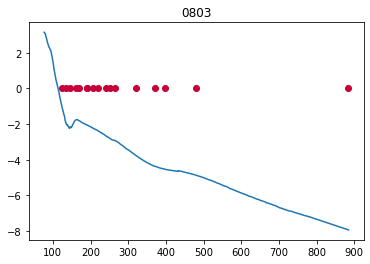

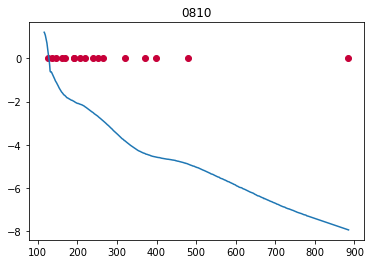

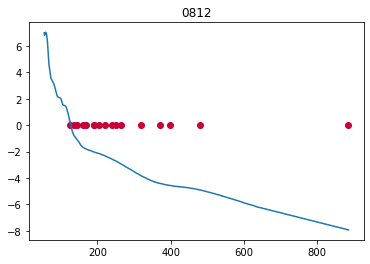

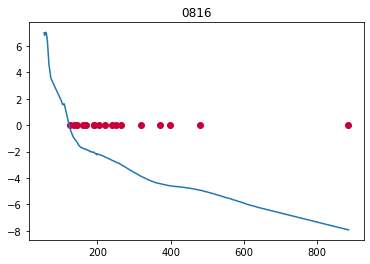

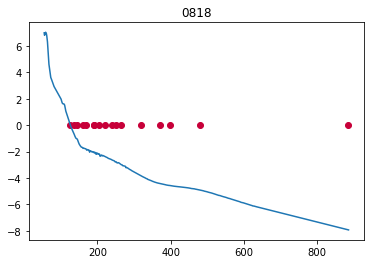

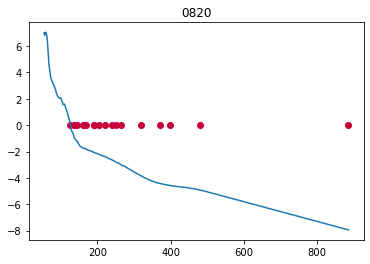

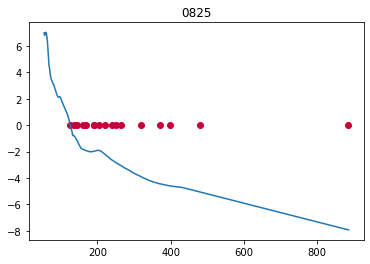

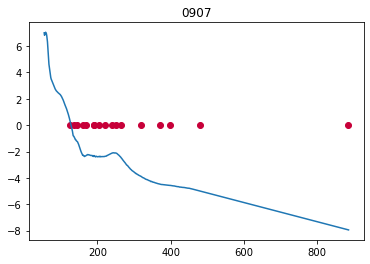

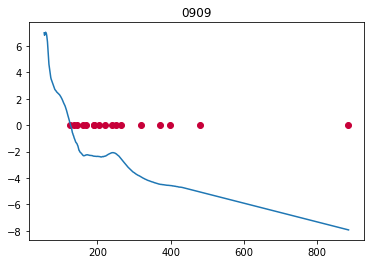

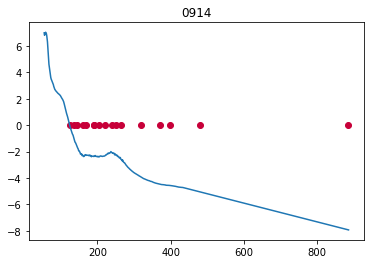

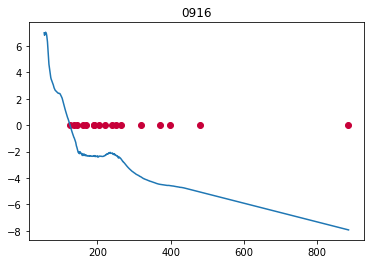

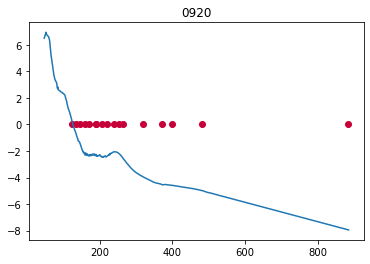

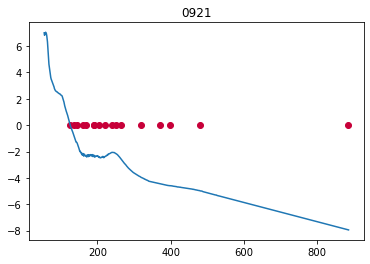

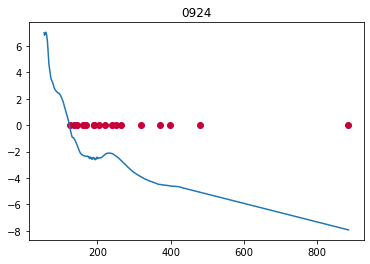

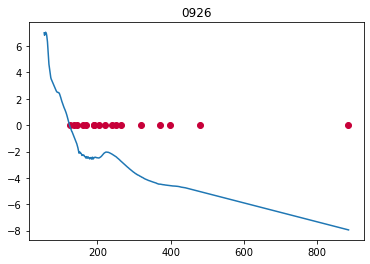

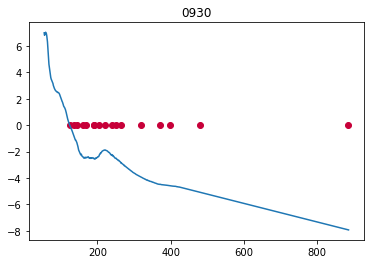

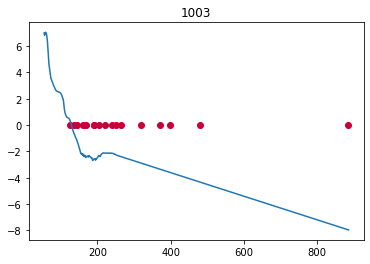

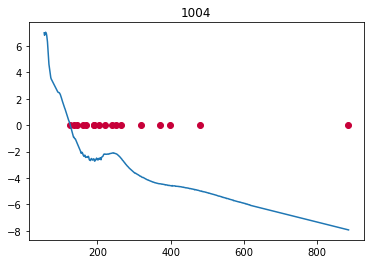

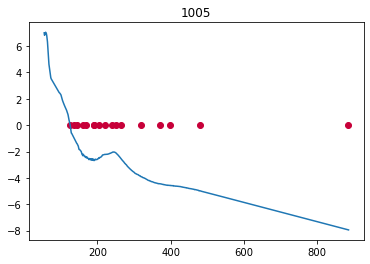

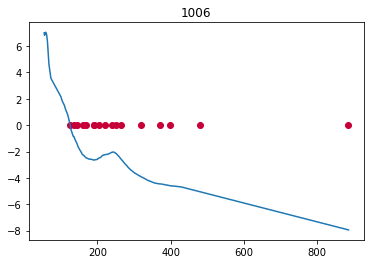

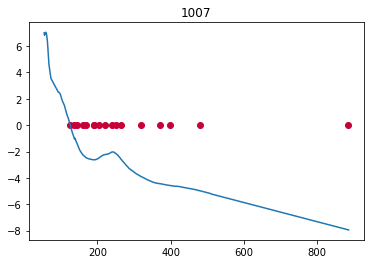

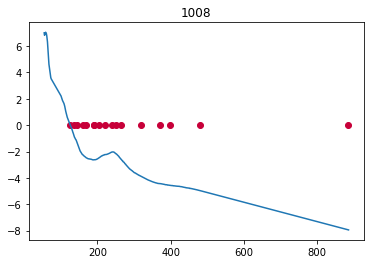

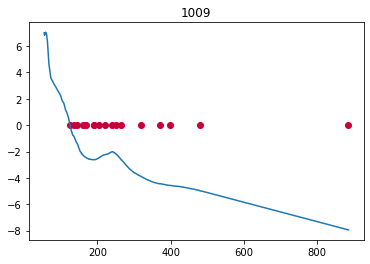

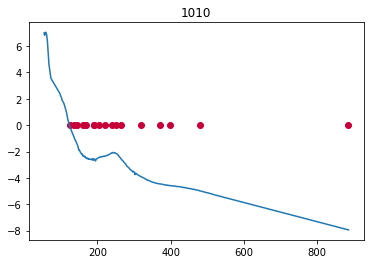

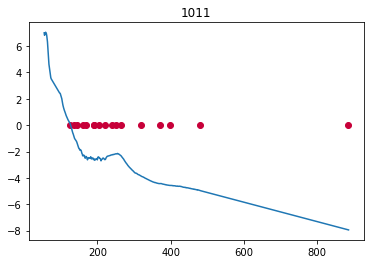

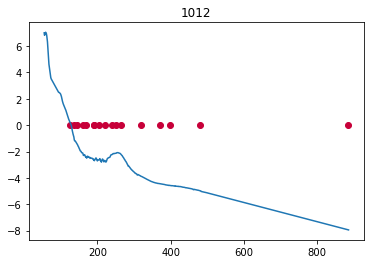

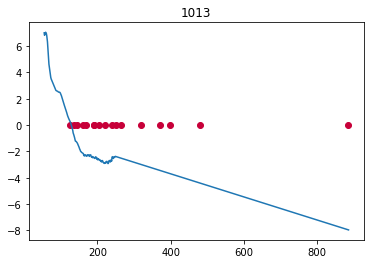

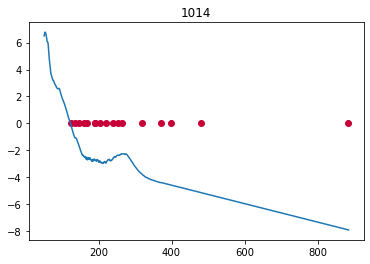

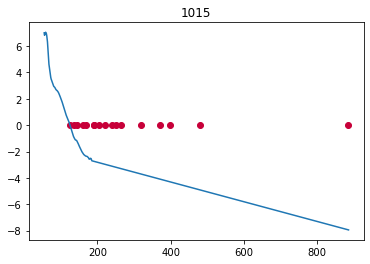

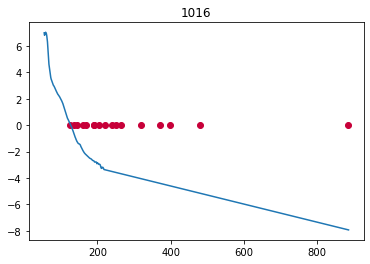

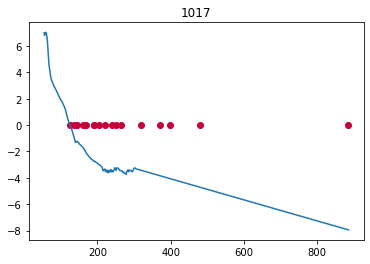

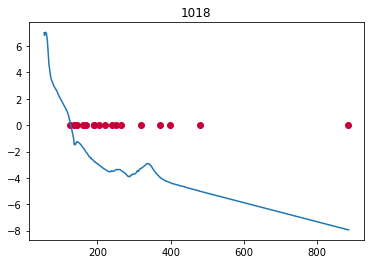

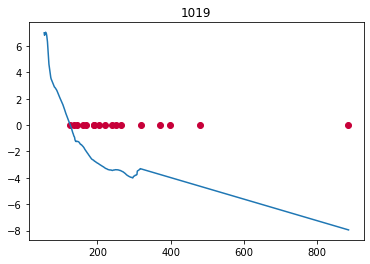

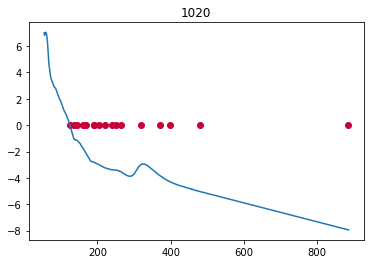

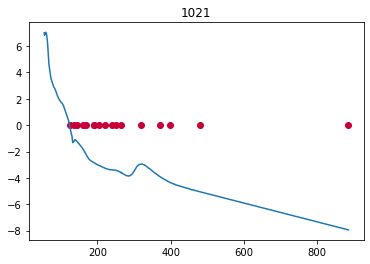

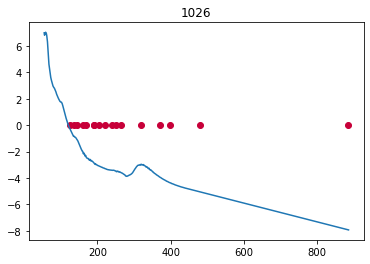

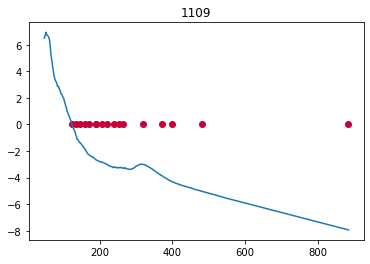

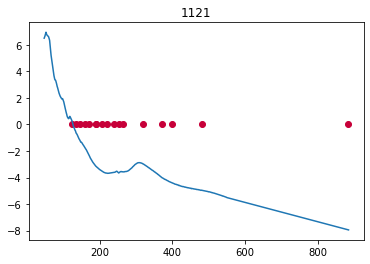

In [61]:
for pro_file in profiles:
    Elevation = pd.read_excel(pro_file, index_col=0)
    plt.plot(Elevation.iloc[:, 0].values, Elevation.iloc[:, 1].values)
    plt.scatter([loc * -1 for loc in sens_loc], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], color='#C70039')
    #os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\plots_cache')
    plt.savefig('profile_plot_' + pro_file[4:8] + '.png')
    plt.title('1994' + pro_file[4:8])
    plt.show()
    #os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\Profiles_Excel')

In [ ]:
workbook = load_workbook(filename="spectral_analysis4.xlsx")
"""

"""
#sheet = workbook.active
#sheet
sheets = workbook.sheetnames
for loop in range(len(sheets)):
    ws = workbook.worksheets[loop]
    #img = openpyxl.drawing.image.Image('profile_plot_' + sheets[loop][0:4] + '.png')
    #img.anchor = 'K2'
    #ws.add_image(img)
    ws.write('B20', )
workbook.save("out99.xlsx")

In [4]:
case_ornek = "08030100.ppp02"

In [5]:
case2 = case_ornek[:4]
profile_file = "1994" + case2 +".xlsx"

In [6]:
os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022\\Profiles_Excel')
Elevation = pd.read_excel(profile_file, index_col=0)

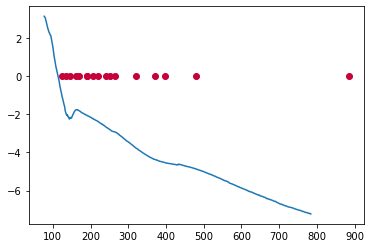

In [9]:
os.chdir('C:\\Users\\pc\\OneDrive_GTU\\OneDrive - Gebze Teknik Üniversitesi\\Tez\\Proje\\proje 2022')
plt.plot(Elevation.iloc[:, 0].values, Elevation.iloc[:, 1].values)
plt.scatter([loc * -1 for loc in sens_loc], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], color='#C70039')
plt.savefig('test_profile_plot.png')
#plt.show()

In [8]:
sensor = ["p87", "p19", "p18", "p45", "p17", "p15", "p16", "p14", "p13", "p12", "p26", "p23", "p05", "p04", "p03", "p02", "p01"]
sens_loc = [-884.1100, -480.3400, -398.3900, -370.0800, -320.3700, -264.7000, -252.0300, -240.55000, -220.2300, -205.3400, -190.2000, -190.2000, -169.5000, -160.7700, -145.4200, -135.0100, -124.9400]

In [20]:
sens_index = sensor.index(case_ornek[-3:])
float(sens_loc[sens_index])

-134.01

In [12]:
fx = data.iloc[:, 0].values
psd = data.iloc[:, 2].values

In [31]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 78BF-2C1B

 Directory of C:\Users\pc\OneDrive_GTU\OneDrive - Gebze Teknik šniversitesi\Tez\Proje\proje 2022\Spectrum_Ortak

02.03.2022  15:50    <DIR>          .
02.03.2022  15:50    <DIR>          ..
07.12.2021  03:22           126.242 08030100_Fit_Data.xlsx
07.12.2021  03:22           126.260 08030400_Fit_Data.xlsx
07.12.2021  03:22           134.017 08031000_Fit_Data.xlsx
07.12.2021  03:22            92.646 08031300_Fit_Data.xlsx
07.12.2021  03:22           118.581 08031600_Fit_Data.xlsx
07.12.2021  03:22           125.848 08031900_Fit_Data.xlsx
07.12.2021  03:22           124.729 08032200_Fit_Data.xlsx
07.12.2021  03:22            49.057 08100100_Fit_Data.xlsx
07.12.2021  03:22            49.122 08100400_Fit_Data.xlsx
07.12.2021  03:22            21.825 08101300_Fit_Data.xlsx
07.12.2021  03:22            22.176 08101600_Fit_Data.xlsx
07.12.2021  03:22            22.678 08101900_Fit_Data.xlsx
07.12.2021  03:22            22.5

07.12.2021  04:30           132.608 10101900_Fit_Data.xlsx
07.12.2021  04:30           133.251 10102200_Fit_Data.xlsx
07.12.2021  04:30           133.917 10110100_Fit_Data.xlsx
07.12.2021  04:30           133.462 10110400_Fit_Data.xlsx
07.12.2021  04:30           133.483 10110700_Fit_Data.xlsx
07.12.2021  04:30           133.662 10111000_Fit_Data.xlsx
07.12.2021  04:30           133.123 10111300_Fit_Data.xlsx
07.12.2021  04:30           132.455 10111600_Fit_Data.xlsx
07.12.2021  04:30           132.814 10111900_Fit_Data.xlsx
07.12.2021  04:30           133.557 10112200_Fit_Data.xlsx
07.12.2021  04:30           132.739 10120100_Fit_Data.xlsx
07.12.2021  04:30           132.348 10120400_Fit_Data.xlsx
07.12.2021  04:30           133.196 10120700_Fit_Data.xlsx
07.12.2021  04:30           133.735 10121000_Fit_Data.xlsx
07.12.2021  04:30           133.698 10121300_Fit_Data.xlsx
07.12.2021  04:30           133.259 10121600_Fit_Data.xlsx
07.12.2021  04:30           132.857 10121900_Fit_Data.xl

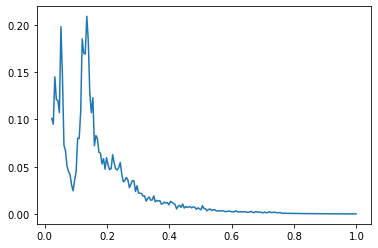

In [13]:
plt.plot(fx, psd)
plt.show()

In [14]:
m0=np.trapz(psd,fx)
m1=np.trapz(psd*fx,fx)
m2=np.trapz(psd*fx*fx,fx)
T01=m0/m1
T02=math.sqrt(m0/m2)
print('m0=',m0,'\nm1=',m1,'\nm2=',m2,'\nT01=',T01,'\nT02=',T02)

m0= 0.024421776245682425 
m1= 0.004244428448109631 
m2= 0.0011605036400022515 
T01= 5.753843313475885 
T02= 4.587386904153146


$H_{mo}$ is the spectral equivalent of the significant wave height $H_s$.

In [15]:
Hm0=math.sqrt(m0)*4
print('Hm0=',Hm0)

Hm0= 0.6250987281469375
